# Python Programming with Numpy 

## Introduction

This lab will focus on the widely-used library Numpy, which provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy. In such case, we also recommend the numpy for [Matlab users page](https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html).

In detail, we will cover the usage of Arrays, Array indexing, Datatypes, Array math, Broadcasting, etc. in this tutorial.

Note: Before reading this tutorial you should know a bit of Python. If you would like to refresh your memory, take a look at Python_01_Basic.

If you wish to work the examples in this tutorial, you must also have some software installed on your computer. Please click [here](http://scipy.org/install.html) for instructions or find some references from Lab 1.

## Numpy

*NumPy is the fundamental library for scientific computing with Python. NumPy is centered around a powerful N-dimensional array object, and it also contains useful linear algebra, Fourier transform, and random number functions.*


To use Numpy, we first need to import the `numpy` package:

In [2]:
import numpy as np

### Creating arrays

NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers. In NumPy dimensions are called axes. The number of axes is rank.

For example, the coordinates of a point in 3D space [1, 2, 1] is an array of rank 1, because it has one axis. That axis has a length of 3. In the example pictured below, the array has rank 2 (it is 2-dimensional). The first dimension (axis) has a length of 2, the second dimension has a length of 3.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

## `np.zeros`
The function zeros creates an array full of zeros, the function ones creates an array full of ones, and the function empty creates an array whose initial content is random and depends on the state of the memory. By default, the dtype of the created array is float64.

In [5]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

It's just as easy to create a 2D array (ie. a matrix) by providing a tuple with the desired number of rows and columns. For example, here's a 3x4 matrix:

In [6]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

## Some vocabulary

* In NumPy, each dimension is called an **axis**.
* The number of axes is called the **rank**. (This is different to the matrx rank in math)
    * For example, the above 3x4 matrix is an array of rank 2 (it is 2-dimensional).
    * The first axis has length 3, the second has length 4.
* An array's list of axis lengths is called the **shape** of the array.
    * For example, the above matrix's shape is `(3, 4)`.
    * The rank is equal to the shape's length.
* The **size** of an array is the total number of elements, which is the product of all axis lengths (eg. 3*4=12)

In [8]:
a = np.zeros((3,4))
a

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [9]:
a.shape

(3, 4)

In [10]:
a.ndim  # equal to len(a.shape)

2

In [11]:
a.size

12

## N-dimensional arrays
You can also create an N-dimensional array of arbitrary rank. For example, here's a 3D array (rank=3), with shape `(2,3,4)`:

In [12]:
np.zeros((2,3,4))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

## Array type
NumPy arrays have the type `ndarray`s:

In [13]:
type(np.zeros((3,4)))

numpy.ndarray

## `np.ones`
Many other NumPy functions create `ndarrays`.

Here's a 3x4 matrix full of ones:

In [14]:
np.ones((3,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

## `np.full`
Creates an array of the given shape initialized with the given value. Here's a 3x4 matrix full of `π`.

In [15]:
np.full((3,4), np.pi)

array([[3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265]])

##  `np.eye`

Creates an array as a identity matrix, the element value of the diagonal is 1.

In [17]:
d = np.eye(2)         # Create a 2x2 identity matrix
print(d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

[[1. 0.]
 [0. 1.]]


## np.array
Of course you can initialize an `ndarray` using a regular python array. Just call the `array` function:

In [18]:
np.array([[1,2,3,4], [10, 20, 30, 40]])

array([[ 1,  2,  3,  4],
       [10, 20, 30, 40]])

## `np.arange`
You can create an `ndarray` using NumPy's `range` function, which is similar to python's built-in `range` function:

To create sequences of numbers, NumPy provides a function analogous to range that returns arrays instead of lists. For example:

In [19]:
np.arange(1, 5)

array([1, 2, 3, 4])

It also works with floats:

In [16]:
np.arange(1.0, 5.0)

array([ 1.,  2.,  3.,  4.])

Of course you can provide a step parameter:

In [17]:
np.arange(1, 5, 0.5)

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

However, when dealing with floats, the exact number of elements in the array is not always predictible. For example, consider this:

In [20]:
print(np.arange(0, 5/3, 1/3)) # depending on floating point errors, the max value is 4/3 or 5/3.
print(np.arange(0, 5/3, 0.333333333))
print(np.arange(0, 5/3, 0.333333334))


[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]
[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]
[0.         0.33333333 0.66666667 1.         1.33333334]


## `np.linspace`
For this reason, it is generally preferable to use the `linspace` function instead of `arange` when working with floats. The `linspace` function returns an array containing a specific number of points evenly distributed between two values (note that the maximum value is *included*, contrary to `arange`):

In [31]:
print(np.linspace(0, 5/3, 6))

[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]


## `np.random.rand` and `np.random.randn`
A number of functions are available in NumPy's `random` module to create `ndarray`s initialized with random values.
the input parameters are `d0, d1, ..., dn`.

For example, here is a 3x4 matrix initialized with random floats between 0 and 1 (uniform distribution):

In [32]:
np.random.rand(3,4)

array([[0.6945541 , 0.8640628 , 0.84363576, 0.48517332],
       [0.51624967, 0.74857002, 0.93039924, 0.44086415],
       [0.94874268, 0.93628551, 0.39708955, 0.04467831]])

In [33]:
np.random.rand(2,3,4)

array([[[0.88038472, 0.06399166, 0.24989421, 0.34595791],
        [0.71863552, 0.85592376, 0.94365886, 0.37936648],
        [0.85832133, 0.74318817, 0.33485636, 0.0785425 ]],

       [[0.32074008, 0.06027027, 0.18588949, 0.73458595],
        [0.38310066, 0.90703978, 0.71228482, 0.74958554],
        [0.76373377, 0.93782093, 0.49029962, 0.3929173 ]]])

Here's a 3x4 matrix containing random floats sampled from a univariate [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) (Gaussian distribution) of mean 0 and variance 1:

In [34]:
np.random.randn(3,4)

array([[-1.15009716,  1.28997511, -0.12094983, -1.29879458],
       [-0.11915916, -0.66728904, -0.36805412,  0.53797157],
       [ 2.16272836,  1.14008029,  0.94215218,  0.21739726]])

To give you a feel of what these distributions look like, let's use matplotlib (see the [matplotlib tutorial](tools_matplotlib.ipynb) for more details):

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

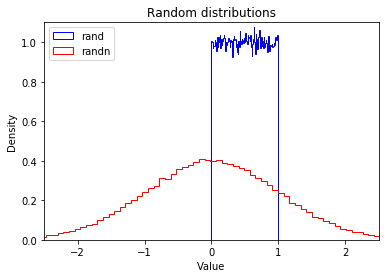

In [36]:
plt.hist(np.random.rand(100000), normed=True, bins=100, histtype="step", color="blue", label="rand")
plt.hist(np.random.randn(100000), normed=True, bins=100, histtype="step", color="red", label="randn")
plt.axis([-2.5, 2.5, 0, 1.1])
plt.legend(loc = "upper left")
plt.title("Random distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

## `np.random.random` 
Return random floats in the half-open interval $[0.0, 1.0)$

The main difference is the input should be `size`.


In [37]:
np.random.random((2,2))  # Create an array filled with random values

array([[0.45240757, 0.81449965],
       [0.53477093, 0.1793782 ]])

In [40]:
np.random.random((2,3,4)

array([[[0.73699626, 0.1131328 , 0.22159512, 0.71780147],
        [0.75910559, 0.51611019, 0.48173457, 0.39312505],
        [0.74910233, 0.99962504, 0.32047148, 0.9236907 ]],

       [[0.52708411, 0.47130347, 0.36334098, 0.03947781],
        [0.46537662, 0.0644658 , 0.41124199, 0.0384565 ],
        [0.95140207, 0.16604106, 0.9452477 , 0.56229681]]])

##  `np.random.randint`
Return random integers from low (inclusive) to high (exclusive). 
Return random integers from the “discrete uniform” distribution of the specified dtype in the “half-open” interval $[low, high)$. 
If high is None (the default), then results are from $[0, low)$.
```numpy.random.randint(low, high=None, size=None, dtype='l')```

In [41]:
np.random.randint(2, size=10)

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [42]:
np.random.randint(5, size=(2, 4))

array([[0, 3, 0, 3],
       [2, 4, 2, 0]])

In [43]:
np.random.randint(10, 20, size=(2, 4))

array([[12, 18, 19, 10],
       [11, 11, 12, 16]])

## `np.fromfunction`
Construct an array by executing a function over each coordinate.
You can also initialize an `ndarray` using a function:
```numpy.fromfunction(function, shape, **kwargs)```
The resulting array therefore has a value $f_n(x, y, z)$ at coordinate $(x, y, z)$.

In [45]:
np.fromfunction(lambda i, j: i == j, (3, 3), dtype=int)

array([[ True, False, False],
       [False,  True, False],
       [False, False,  True]])

In [46]:
np.fromfunction(lambda i, j: i + j, (3, 3), dtype=int)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [50]:
def my_function(z, y, x):
    return x * y + z

np.fromfunction(my_function, (3, 2, 10))

array([[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]],

       [[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]],

       [[ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]]])

NumPy first creates three `ndarrays` (one per dimension), each of shape `(2, 10)`. Each array has values equal to the coordinate along a specific axis. For example, all elements in the `z` array are equal to their z-coordinate:

    [[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
      [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
    
     [[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
      [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
    
     [[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
      [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]]]

So the terms x, y and z in the expression `x * y + z` above are in fact `ndarray`s (we will discuss arithmetic operations on arrays below).  The point is that the function `my_function` is only called *once*, instead of once per element. This makes initialization very efficient.

### Array Attributes

NumPy’s array class is called ndarray and the more important attributes of an ndarray object are:

ndarray.ndim: the number of axes (dimensions) of the array. 

ndarray.shape: the dimensions of the array. This is a tuple of integers indicating the size of the array in each dimension. For a matrix with n rows and m columns, shape will be (n,m). The length of the shape tuple is therefore the rank, or number of dimensions, ndim.

ndarray.size: the total number of elements of the array. 

ndarray.dtype: an object describing the type of the elements in the array. One can create or specify dtype’s using standard Python types. Additionally NumPy provides types of its own. numpy.int32, numpy.int16, and numpy.float64 are some examples.

Here are some instances for the usage of 'ndarray.ndim', 'ndarray.shape', 'ndarray.size', and 'ndarray.dtype'.

## `dtype`
NumPy's `ndarray`s are also efficient in part because all their elements must have the same type (usually numbers).
You can check what the data type is by looking at the `dtype` attribute:

In [52]:
c = np.arange(1, 5)
print(c.dtype, c)

int32 [1 2 3 4]


In [53]:
c = np.arange(1.0, 5.0)
print(c.dtype, c)

float64 [1. 2. 3. 4.]


Instead of letting NumPy guess what data type to use, you can set it explicitly when creating an array by setting the `dtype` parameter:

In [54]:
d = np.arange(1, 5, dtype=np.complex64)
print(d.dtype, d)

complex64 [1.+0.j 2.+0.j 3.+0.j 4.+0.j]


Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [17]:
import numpy as np

x = np.array([1, 2])   # Let numpy choose the datatype
print(x.dtype)         # Prints "int64"

int64


In [18]:
x = np.array([1.0, 2.0])   # Let numpy choose the datatype
print(x.dtype)             # Prints "float64"

float64


In [19]:
x = np.array([1, 2], dtype=np.int64)   # Force a particular datatype
print(x.dtype)                         # Prints "int64"

int64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html). Also, you can read about other methods of array creation [in the tutorial](https://docs.scipy.org/doc/numpy/user/basics.creation.html#arrays-creation).

Available data types include `int8`, `int16`, `int32`, `int64`, `uint8`|`16`|`32`|`64`, `float16`|`32`|`64` and `complex64`|`128`. Check out [the documentation](http://docs.scipy.org/doc/numpy-1.10.1/user/basics.types.html) for the full list.

## `itemsize`
The `itemsize` attribute returns the size (in bytes) of each item:

In [28]:
e = np.arange(1, 5, dtype=np.complex64)
e.itemsize

8

In [12]:
import numpy as np
a = np.arange(15).reshape(3, 5)
print (a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [13]:
a.shape # should return (3,5)

(3, 5)

In [14]:
a.size  # should return 15

15

In [15]:
a.ndim  # should return 2

2

In [16]:
a.dtype # return 'int64'

dtype('int64')

## `data` buffer
An array's data is actually stored in memory as a flat (one dimensional) byte buffer. It is available *via* the `data` attribute (you will rarely need it, though).

In [55]:
f = np.array([[1,2],[1000, 2000]], dtype=np.int32)
f.data

In python 2, `f.data` is a buffer. In python 3, it is a memoryview.

In [56]:
if (hasattr(f.data, "tobytes")):
    data_bytes = f.data.tobytes() # python 3
else:
    data_bytes = memoryview(f.data).tobytes() # python 2

data_bytes

b'\x01\x00\x00\x00\x02\x00\x00\x00\xe8\x03\x00\x00\xd0\x07\x00\x00'

Several `ndarrays` can share the same data buffer, meaning that modifying one will also modify the others. We will see an example in a minute.

# Reshaping an array
## In place
Changing the shape of an `ndarray` is as simple as setting its `shape` attribute. However, the array's size must remain the same.

In [57]:
g = np.arange(24)
print(g)
print("Rank:", g.ndim)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Rank: 1


In [58]:
g.shape = (6, 4)
print(g)
print("Rank:", g.ndim)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
Rank: 2


In [59]:
g.shape = (2, 3, 4)
print(g)
print("Rank:", g.ndim)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
Rank: 3


## `ravel`
Finally, the `ravel` function returns a new one-dimensional `ndarray` that also points to the same data:
It is equivalent to `reshape(-1, order=order)`. 
`numpy.ravel(a, order='C')`

**order** : {‘C’,’F’, ...}, optional. The elements of a are read using this index order. ‘C’ means to index the elements in row-major, ‘F’ means to index the elements in column-major

In [61]:
g.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [66]:
x = np.array([[1, 2, 3], [4, 5, 6]])
print(x)

[[1 2 3]
 [4 5 6]]


In [67]:
print(np.ravel(x))

[1 2 3 4 5 6]


In [69]:
print(np.ravel(x, order = 'C')) 

[1 2 3 4 5 6]


In [70]:
 print(np.ravel(x, order='F'))

[1 4 2 5 3 6]


## `reshape`
The `reshape` function returns a new `ndarray` object pointing at the **same** data. This means that modifying one array will also modify the other.

In [74]:
g = np.arange(24)
g2 = g.reshape(4,6)
print(g2)
print("Rank:", g2.ndim)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
Rank: 2


Set item at row 1, col 2 to 999 (more about indexing below).

In [75]:
g2[1, 2] = 999
g2

array([[  0,   1,   2,   3,   4,   5],
       [  6,   7, 999,   9,  10,  11],
       [ 12,  13,  14,  15,  16,  17],
       [ 18,  19,  20,  21,  22,  23]])

The corresponding element in `g` has been modified.

In [76]:
g

array([  0,   1,   2,   3,   4,   5,   6,   7, 999,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23])

# Array indexing
## One-dimensional arrays
One-dimensional NumPy arrays can be accessed more or less like regular python arrays:

In [130]:
a = np.array([1, 5, 3, 19, 13, 7, 3])
a[3]

19

In [131]:
a[2:5]

array([ 3, 19, 13])

In [132]:
a[2:-1]

array([ 3, 19, 13,  7])

In [133]:
a[:2]

array([1, 5])

In [134]:
a[2::2]

array([ 3, 13,  3])

In [135]:
a[::-1]

array([ 3,  7, 13, 19,  3,  5,  1])

You can also modify an `ndarray` slice:

In [72]:
a[2:5] = [997, 998, 999]
a

array([  1,   5, 997, 998, 999,   7,   3])

Of course, you can modify elements:

In [71]:
a[3]=999
a

array([  1,   5,   3, 999,  13,   7,   3])

## Differences with regular python arrays
Contrary to regular python arrays, if you assign a single value to an `ndarray` slice, it is copied across the whole slice, thanks to broadcasting rules discussed above.

In [136]:
a[2:5] = -1
a

array([ 1,  5, -1, -1, -1,  7,  3])

Also, you cannot grow or shrink `ndarray`s this way:

In [137]:
try:
    a[2:5] = [1,2,3,4,5,6]  # too long
except ValueError as e:
    print(e)

cannot copy sequence with size 6 to array axis with dimension 3


You cannot delete elements either:

In [138]:
try:
    del a[2:5]
except ValueError as e:
    print(e)

cannot delete array elements


Last but not least, `ndarray` **slices are actually *views*** on the same data buffer. This means that if you create a slice and modify it, you are actually going to modify the original `ndarray` as well!

In [139]:
a_slice = a[2:6]
a_slice[1] = 1000
a  # the original array was modified!

array([   1,    5,   -1, 1000,   -1,    7,    3])

In [140]:
a[3] = 2000
a_slice  # similarly, modifying the original array modifies the slice!

array([  -1, 2000,   -1,    7])

If you want a copy of the data, you need to use the `copy` method:

In [141]:
another_slice = a[2:6].copy()
another_slice[1] = 3000
a  # the original array is untouched

array([   1,    5,   -1, 2000,   -1,    7,    3])

In [142]:
a[3] = 4000
another_slice  # similary, modifying the original array does not affect the slice copy

array([  -1, 3000,   -1,    7])

## Multi-dimensional arrays
Multi-dimensional arrays can be accessed in a similar way by providing an index or slice for each axis, separated by commas:

In [143]:
b = np.arange(48).reshape(4, 12)
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [144]:
b[1, 2]  # row 1, col 2

14

In [145]:
b[1, :]  # row 1, all columns

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [146]:
b[:, 1]  # all rows, column 1

array([ 1, 13, 25, 37])

**Caution**: 
***note the subtle difference between these two expressions: ***

In [84]:
b[1, :]

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [147]:
b[1:2, :]

array([[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

The first expression returns row 1 as a 1D array of shape `(12,)`, while the second returns that same row as a 2D array of shape `(1, 12)`.

## Fancy indexing
You may also specify a list of indices that you are interested in. This is referred to as *fancy indexing*.

In [148]:
b[(0,2), 2:5]  # rows 0 and 2, columns 2 to 4 (5-1)

array([[ 2,  3,  4],
       [26, 27, 28]])

In [149]:
b[:, (-1, 2, -1)]  # all rows, columns -1 (last), 2 and -1 (again, and in this order)

array([[11,  2, 11],
       [23, 14, 23],
       [35, 26, 35],
       [47, 38, 47]])

If you provide multiple index arrays, you get a 1D `ndarray` containing the values of the elements at the specified coordinates.

In [150]:
b[(-1, 2, -1, 2), (5, 9, 1, 9)]  # returns a 1D array with b[-1, 5], b[2, 9], b[-1, 1] and b[2, 9] (again)

array([41, 33, 37, 33])

## Higher dimensions
Everything works just as well with higher dimensional arrays, but it's useful to look at a few examples:

In [151]:
c = b.reshape(4,2,6)
c

array([[[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]],

       [[12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]],

       [[24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35]],

       [[36, 37, 38, 39, 40, 41],
        [42, 43, 44, 45, 46, 47]]])

In [152]:
c[2, 1, 4]  # matrix 2, row 1, col 4

34

In [91]:
c[2, :, 3]  # matrix 2, all rows, col 3

array([27, 33])

If you omit coordinates for some axes, then all elements in these axes are returned:

In [153]:
c[2, 1]  # Return matrix 2, row 1, all columns.  This is equivalent to c[2, 1, :]

array([30, 31, 32, 33, 34, 35])

## Ellipsis (`...`)
You may also write an ellipsis (`...`) to ask that all non-specified axes be entirely included.

In [154]:
c[2, ...]  #  matrix 2, all rows, all columns.  This is equivalent to c[2, :, :]

array([[24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [155]:
c[2, 1, ...]  # matrix 2, row 1, all columns.  This is equivalent to c[2, 1, :]

array([30, 31, 32, 33, 34, 35])

In [156]:
c[2, ..., 3]  # matrix 2, all rows, column 3.  This is equivalent to c[2, :, 3]

array([27, 33])

In [157]:
c[..., 3]  # all matrices, all rows, column 3.  This is equivalent to c[:, :, 3]

array([[ 3,  9],
       [15, 21],
       [27, 33],
       [39, 45]])

## Boolean indexing
You can also provide an `ndarray` of boolean values on one axis to specify the indices that you want to access.

In [158]:
b = np.arange(48).reshape(4, 12)
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [159]:
rows_on = np.array([True, False, True, False])
b[rows_on, :]  # Rows 0 and 2, all columns. Equivalent to b[(0, 2), :]

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]])

In [160]:
cols_on = np.array([False, True, False] * 4)
b[:, cols_on]  # All rows, columns 1, 4, 7 and 10

array([[ 1,  4,  7, 10],
       [13, 16, 19, 22],
       [25, 28, 31, 34],
       [37, 40, 43, 46]])

## `np.ix_`
You cannot use boolean indexing this way on multiple axes, but you can work around this by using the `ix_` function:

In [161]:
b[np.ix_(rows_on, cols_on)]

array([[ 1,  4,  7, 10],
       [25, 28, 31, 34]])

In [101]:
np.ix_(rows_on, cols_on)

(array([[0],
        [2]]), array([[ 1,  4,  7, 10]]))

If you use a boolean array that has the same shape as the `ndarray`, then you get in return a 1D array containing all the values that have `True` at their coordinate. This is generally used along with conditional operators:

In [162]:
b[b % 3 == 1]

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46])

# Iterating
Iterating over `ndarray`s is very similar to iterating over regular python arrays. Note that iterating over multidimensional arrays is done with respect to the first axis.

In [163]:
c = np.arange(24).reshape(2, 3, 4)  # A 3D array (composed of two 3x4 matrices)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [164]:
for m in c:
    print("Item:")
    print(m)

Item:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Item:
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [165]:
for i in range(len(c)):  # Note that len(c) == c.shape[0]
    print("Item:")
    print(c[i])

Item:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Item:
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


If you want to iterate on *all* elements in the `ndarray`, simply iterate over the `flat` attribute:

In [106]:
for i in c.flat:
    print("Item:", i)

Item: 0
Item: 1
Item: 2
Item: 3
Item: 4
Item: 5
Item: 6
Item: 7
Item: 8
Item: 9
Item: 10
Item: 11
Item: 12
Item: 13
Item: 14
Item: 15
Item: 16
Item: 17
Item: 18
Item: 19
Item: 20
Item: 21
Item: 22
Item: 23


Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [77]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]

# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [78]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)  # Prints "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape)  # Prints "[[ 2]
                             #          [ 6]
                             #          [10]] (3, 1)"

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [79]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])  # Prints "[1 4 5]"

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  # Prints "[1 4 5]"

# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])  # Prints "[2 2]"

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))  # Prints "[2 2]"

[1 4 5]
[1 4 5]
[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [80]:
import numpy as np

# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(a)  # prints "array([[ 1,  2,  3],
          #                [ 4,  5,  6],
          #                [ 7,  8,  9],
          #                [10, 11, 12]])"

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [81]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [82]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10

print(a)  # prints "array([[11,  2,  3],
          #                [ 4,  5, 16],
          #                [17,  8,  9],
          #                [10, 21, 12]])

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [83]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)   # Find the elements of a that are bigger than 2;
                     # this returns a numpy array of Booleans of the same
                     # shape as a, where each slot of bool_idx tells
                     # whether that element of a is > 2.

print(bool_idx)      # Prints "[[False False]
                     #          [ True  True]

                     #          [ True  True]]"

[[False False]
 [ True  True]
 [ True  True]]


We use boolean array indexing to construct a rank 1 array consisting of the elements of a corresponding to the True values of bool_idx

In [84]:
print(a[bool_idx])  # Prints "[3 4 5 6]"

# We can do all of the above in a single concise statement:
print(a[a > 2])     # Prints "[3 4 5 6]"

[3 4 5 6]
[3 4 5 6]


One more example to help you understand the indexing. Try the following commands and see the results

In [85]:
a = np.arange(10)**3
print(a)

[  0   1   8  27  64 125 216 343 512 729]


In [86]:
a[2]

8

In [87]:
a[2:5]

array([ 8, 27, 64], dtype=int32)

In [88]:
a[:6:2] = -1000    # equivalent to a[0:6:2] = -1000; from start to position 6, exclusive, set every 2nd element to -1000
print(a)

[-1000     1 -1000    27 -1000   125   216   343   512   729]


In [89]:
a[ : :-1]   # reversed a

array([  729,   512,   343,   216,   125, -1000,    27, -1000,     1,
       -1000], dtype=int32)

For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should [read the documentation](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html)

Multidimensional arrays can have one index per axis. These indices are given in a tuple separated by commas. For example:

In [90]:
b = np.arange(15).reshape(3, 5)
b

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [91]:
b[2,3]                         # select the element in the third row and fourth column of b

13

In [92]:
b[0:5, 1]                       # each row in the second column of b

array([ 1,  6, 11])

In [93]:
b[ : ,1]                        # equivalent to the previous example

array([ 1,  6, 11])

In [94]:
b[1:3, : ]                      # each column in the second and third row of b

array([[ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

# Arithmetic operations
All the usual arithmetic operators (`+`, `-`, `*`, `/`, `//`, `**`, etc.) can be used with `ndarray`s. They apply *elementwise*:

Note that the multiplication is *not* a matrix multiplication. We will discuss matrix operations below.

The arrays must have the same shape. If they do not, NumPy will apply the *broadcasting rules*.

In [95]:
a = np.array([14, 23, 32, 41])
b = np.array([5,  4,  3,  2])
print("a + b  =", a + b)
print("a - b  =", a - b)
print("a * b  =", a * b)
print("a / b  =", a / b)
print("a // b  =", a // b)
print("a % b  =", a % b)
print("a ** b =", a ** b)

a + b  = [19 27 35 43]
a - b  = [ 9 19 29 39]
a * b  = [70 92 96 82]
a / b  = [ 2.8         5.75       10.66666667 20.5       ]
a // b  = [ 2  5 10 20]
a % b  = [4 3 2 1]
a ** b = [537824 279841  32768   1681]


Note that the multiplication is *not* a matrix multiplication. We will discuss matrix operations below.

The arrays must have the same shape. If they do not, NumPy will apply the *broadcasting rules*.

# Broadcasting

In general, when NumPy expects arrays of the same shape but finds that this is not the case, it applies the so-called *broadcasting* rules:

## First rule
*If the arrays do not have the same rank, then a 1 will be prepended to the smaller ranking arrays until their ranks match.*

In [100]:
h = np.arange(5).reshape(1, 1, 5)
h

array([[[0, 1, 2, 3, 4]]])

Now let's try to add a 1D array of shape `(5,)` to this 3D array of shape `(1,1,5)`. Applying the first rule of broadcasting!

In [101]:
h + [10, 20, 30, 40, 50]  # same as: h + [[[10, 20, 30, 40, 50]]]

array([[[10, 21, 32, 43, 54]]])

## Second rule
*Arrays with a 1 along a particular dimension act as if they had the size of the array with the largest shape along that dimension. The value of the array element is repeated along that dimension.*

In [102]:
k = np.arange(6).reshape(2, 3)
k

array([[0, 1, 2],
       [3, 4, 5]])

Let's try to add a 2D array of shape `(2,1)` to this 2D `ndarray` of shape `(2, 3)`. NumPy will apply the second rule of broadcasting:

In [106]:
k + [[100], [200]]  # same as: k + [[100, 100, 100], [200, 200, 200]]

array([[100, 101, 102],
       [203, 204, 205]])

Combining rules 1 & 2, we can do this:

In [107]:
k + [100, 200, 300]  # after rule 1: [[100, 200, 300]], and after rule 2: [[100, 200, 300], [100, 200, 300]]

array([[100, 201, 302],
       [103, 204, 305]])

## Third rule
*After rules 1 & 2, the sizes of all arrays must match.*

In [108]:
try:
    k + [33, 44]
except ValueError as e:
    print(e)

operands could not be broadcast together with shapes (2,3) (2,) 


Broadcasting rules are used in many NumPy operations, not just arithmetic operations, as we will see below.
For more details about broadcasting, check out [the documentation](https://docs.scipy.org/doc/numpy-dev/user/basics.broadcasting.html).

## Upcasting
When trying to combine arrays with different `dtype`s, NumPy will *upcast* to a type capable of handling all possible values (regardless of what the *actual* values are).

In [109]:
k1 = np.arange(0, 5, dtype=np.uint8)
print(k1.dtype, k1)

uint8 [0 1 2 3 4]


In [110]:
k2 = k1 + np.array([5, 6, 7, 8, 9], dtype=np.int8)
print(k2.dtype, k2)

int16 [ 5  7  9 11 13]


Note that `int16` is required to represent all *possible* `int8` and `uint8` values (from -128 to 255), even though in this case a uint8 would have sufficed.

In [111]:
k3 = k1 + 1.5
print(k3.dtype, k3)

float64 [1.5 2.5 3.5 4.5 5.5]


# Conditional operators

The conditional operators also apply elementwise:

In [112]:
m = np.array([20, -5, 30, 40])
m < [15, 16, 35, 36]

array([False,  True,  True, False])

And using broadcasting:

In [113]:
m < 25  # equivalent to m < [25, 25, 25, 25]

array([ True,  True, False, False])

This is most useful in conjunction with boolean indexing (discussed below).

In [114]:
m[m < 25]

array([20, -5])

# Mathematical and statistical functions

Many mathematical and statistical functions are available for `ndarray`s.

## `ndarray` methods
Some functions are simply `ndarray` methods, for example:

In [52]:
a = np.array([[-2.5, 3.1, 7], [10, 11, 12]])
print(a)
print("mean =", a.mean())

[[ -2.5   3.1   7. ]
 [ 10.   11.   12. ]]
mean = 6.76666666667


Note that this computes the mean of all elements in the `ndarray`, regardless of its shape.

Here are a few more useful `ndarray` methods:

In [53]:
for func in (a.min, a.max, a.sum, a.prod, a.std, a.var):
    print(func.__name__, "=", func())

min = -2.5
max = 12.0
sum = 40.6
prod = -71610.0
std = 5.08483584352
var = 25.8555555556


These functions accept an optional argument `axis` which lets you ask for the operation to be performed on elements along the given axis. For example:

In [118]:
c=np.arange(24).reshape(2,3,4)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [119]:
c.sum(axis=0)  # sum across matrices

array([[12, 14, 16, 18],
       [20, 22, 24, 26],
       [28, 30, 32, 34]])

In [120]:
c.sum(axis=1)  # sum across rows

array([[12, 15, 18, 21],
       [48, 51, 54, 57]])

You can also sum over multiple axes:

In [121]:
c.sum(axis=(0,2))  # sum across matrices and columns

array([ 60,  92, 124])

In [122]:
0+1+2+3 + 12+13+14+15, 4+5+6+7 + 16+17+18+19, 8+9+10+11 + 20+21+22+23

(60, 92, 124)

## Universal functions
NumPy also provides fast elementwise functions called *universal functions*, or **ufunc**. They are vectorized wrappers of simple functions. For example `square` returns a new `ndarray` which is a copy of the original `ndarray` except that each element is squared:

In [124]:
a = np.array([[-2.5, 3.1, 7], [10, 11, 12]])
np.square(a)

array([[  6.25,   9.61,  49.  ],
       [100.  , 121.  , 144.  ]])

Here are a few more useful unary ufuncs:

In [125]:
print("Original ndarray")
print(a)
for func in (np.abs, np.sqrt, np.exp, np.log, np.sign, np.ceil, np.modf, np.isnan, np.cos):
    print("\n", func.__name__)
    print(func(a))

Original ndarray
[[-2.5  3.1  7. ]
 [10.  11.  12. ]]

 absolute
[[ 2.5  3.1  7. ]
 [10.  11.  12. ]]

 sqrt
[[       nan 1.76068169 2.64575131]
 [3.16227766 3.31662479 3.46410162]]

 exp
[[8.20849986e-02 2.21979513e+01 1.09663316e+03]
 [2.20264658e+04 5.98741417e+04 1.62754791e+05]]

 log
[[       nan 1.13140211 1.94591015]
 [2.30258509 2.39789527 2.48490665]]

 sign
[[-1.  1.  1.]
 [ 1.  1.  1.]]

 ceil
[[-2.  4.  7.]
 [10. 11. 12.]]

 modf
(array([[-0.5,  0.1,  0. ],
       [ 0. ,  0. ,  0. ]]), array([[-2.,  3.,  7.],
       [10., 11., 12.]]))

 isnan
[[False False False]
 [False False False]]

 cos
[[-0.80114362 -0.99913515  0.75390225]
 [-0.83907153  0.0044257   0.84385396]]


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


## Binary ufuncs
There are also many binary ufuncs, that apply elementwise on two `ndarray`s.  Broadcasting rules are applied if the arrays do not have the same shape:

In [126]:
a = np.array([1, -2, 3, 4])
b = np.array([2, 8, -1, 7])
np.add(a, b)  # equivalent to a + b

array([ 3,  6,  2, 11])

In [127]:
np.greater(a, b)  # equivalent to a > b

array([False, False,  True, False])

In [128]:
np.maximum(a, b)

array([2, 8, 3, 7])

In [129]:
np.copysign(a, b)

array([ 1.,  2., -3.,  4.])

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [96]:
import numpy as np

x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [97]:
# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [98]:
# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [99]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [42]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [43]:
import numpy as np

x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


In [44]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

[29 67]
[29 67]


In [45]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


In [46]:
# One more example, try to find the differences
A = np.array([[1,1],[0,1]] )
B =np.array([[2,0],[3,4]] )
print(A*B)                         # elementwise product
print(A.dot(B))                  # matrix product
print(np.dot(A, B))             # another matrix product

[[2 0]
 [0 4]]
[[5 4]
 [3 4]]
[[5 4]
 [3 4]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [47]:
import numpy as np

x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy [in the documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [48]:
import numpy as np

x = np.array([[1,2], [3,4]])
print(x)    # Prints "[[1 2]
            #          [3 4]]"
print(x.T)  # Prints "[[1 3]
            #          [2 4]]"

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [49]:
# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)    # Prints "[1 2 3]"
print(v.T)  # Prints "[1 2 3]"

[1 2 3]
[1 2 3]


NumPy provides familiar mathematical functions such as sin, cos, and exp. In NumPy, these are called “universal functions”(ufunc). Within NumPy, these functions operate elementwise on an array, producing an array as output.

In [50]:
B = np.arange(3)
np.exp(B)

array([1.        , 2.71828183, 7.3890561 ])

In [51]:
np.sqrt(B)

array([0.        , 1.        , 1.41421356])

In [52]:
C = np.array([2., -1., 4.])
np.add(B, C)

array([2., 0., 6.])

Numpy provides many more functions for manipulating arrays; you can see the full list [in the documentation](https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html).

### Reshape an Array

The shape of an array can be changed with various commands. Note that the following three commands all return a modified array, but do not change the original array:

In [53]:
a = np.floor(10*np.random.random((3,4)))
a

array([[4., 7., 6., 5.],
       [9., 4., 9., 9.],
       [5., 4., 3., 2.]])

In [54]:
a.ravel()  # returns the array, flattened

array([4., 7., 6., 5., 9., 4., 9., 9., 5., 4., 3., 2.])

In [55]:
a.reshape(6,2)  # returns the array with a modified shape

array([[4., 7.],
       [6., 5.],
       [9., 4.],
       [9., 9.],
       [5., 4.],
       [3., 2.]])

In [56]:
a.T  # returns the array, transposed

array([[4., 9., 5.],
       [7., 4., 4.],
       [6., 9., 3.],
       [5., 9., 2.]])

In [57]:
print(a.T.shape)
print(a.shape)

(4, 3)
(3, 4)


For more details about reshape function, please refer to the [documentation](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.reshape.html#numpy.reshape)

# Stacking arrays
It is often useful to stack together different arrays. NumPy offers several functions to do just that. Let's start by creating a few arrays.

Several arrays can be stacked together along different axes, i.e.,

In [167]:
q1 = np.full((3,4), 1.0)
q1

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [168]:
q2 = np.full((4,4), 2.0)
q2

array([[2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]])

In [169]:
q3 = np.full((3,4), 3.0)
q3

array([[3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]])

## `vstack`
Now let's stack them vertically using `vstack`:

In [170]:
q4 = np.vstack((q1, q2, q3))
q4

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]])

In [171]:
q4.shape

(10, 4)

This was possible because q1, q2 and q3 all have the same shape (except for the vertical axis, but that's ok since we are stacking on that axis).

## `hstack`
We can also stack arrays horizontally using `hstack`:

In [172]:
q5 = np.hstack((q1, q3))
q5

array([[1., 1., 1., 1., 3., 3., 3., 3.],
       [1., 1., 1., 1., 3., 3., 3., 3.],
       [1., 1., 1., 1., 3., 3., 3., 3.]])

In [173]:
q5.shape

(3, 8)

This is possible because q1 and q3 both have 3 rows. But since q2 has 4 rows, it cannot be stacked horizontally with q1 and q3:

In [174]:
try:
    q5 = np.hstack((q1, q2, q3))
except ValueError as e:
    print(e)

all the input array dimensions except for the concatenation axis must match exactly


## `concatenate`
The `concatenate` function stacks arrays along any given existing axis.

In [179]:
q7 = np.concatenate((q1, q2, q3), axis=0)  # Equivalent to vstack
q7

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]])

In [180]:
q7.shape

(10, 4)

## `stack`
The `stack` function stacks arrays along a new axis. All arrays have to have the same shape.

In [177]:
q8 = np.stack((q1, q3))
q8

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]])

# Splitting arrays
Splitting is the opposite of stacking. For example, let's use the `vsplit` function to split a matrix vertically.

First let's create a 6x4 matrix:

In [182]:
r = np.arange(24).reshape(6,4)
r

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

Now let's split it in three equal parts, vertically:

In [183]:
r1, r2, r3 = np.vsplit(r, 3)
r1

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [184]:
r2

array([[ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [185]:
r3

array([[16, 17, 18, 19],
       [20, 21, 22, 23]])

There is also a `split` function which splits an array along any given axis. Calling `vsplit` is equivalent to calling `split` with `axis=0`. There is also an `hsplit` function, equivalent to calling `split` with `axis=1`:

In [186]:
r4, r5 = np.hsplit(r, 2)
r4

array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13],
       [16, 17],
       [20, 21]])

In [187]:
r5

array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15],
       [18, 19],
       [22, 23]])

# Transposing arrays
The `transpose` method creates a new view on an `ndarray`'s data, with axes permuted in the given order.

For example, let's create a 3D array:

In [191]:
t = np.arange(24).reshape(4,2,3)
t

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23]]])

Now let's create an `ndarray` such that the axes `0, 1, 2` (depth, height, width) are re-ordered to `1, 2, 0` (depth→width, height→depth, width→height):

In [192]:
t1 = t.transpose((1,2,0))
t1

array([[[ 0,  6, 12, 18],
        [ 1,  7, 13, 19],
        [ 2,  8, 14, 20]],

       [[ 3,  9, 15, 21],
        [ 4, 10, 16, 22],
        [ 5, 11, 17, 23]]])

In [193]:
t1.shape

(2, 3, 4)

By default, `transpose` reverses the order of the dimensions:

In [194]:
t2 = t.transpose()  # equivalent to t.transpose((2, 1, 0))
t2

array([[[ 0,  6, 12, 18],
        [ 3,  9, 15, 21]],

       [[ 1,  7, 13, 19],
        [ 4, 10, 16, 22]],

       [[ 2,  8, 14, 20],
        [ 5, 11, 17, 23]]])

In [195]:
t2.shape

(3, 2, 4)

NumPy provides a convenience function `swapaxes` to swap two axes. For example, let's create a new view of `t` with depth and height swapped:

In [196]:
t3 = t.swapaxes(0,1)  # equivalent to t.transpose((1, 0, 2))
t3

array([[[ 0,  1,  2],
        [ 6,  7,  8],
        [12, 13, 14],
        [18, 19, 20]],

       [[ 3,  4,  5],
        [ 9, 10, 11],
        [15, 16, 17],
        [21, 22, 23]]])

In [197]:
t3.shape

(2, 4, 3)

# Transposing arrays
The `transpose` method creates a new view on an `ndarray`'s data, with axes permuted in the given order.

For example, let's create a 3D array:

In [125]:
t = np.arange(24).reshape(4,2,3)
t

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23]]])

Now let's create an `ndarray` such that the axes `0, 1, 2` (depth, height, width) are re-ordered to `1, 2, 0` (depth→width, height→depth, width→height):

In [126]:
t1 = t.transpose((1,2,0))
t1

array([[[ 0,  6, 12, 18],
        [ 1,  7, 13, 19],
        [ 2,  8, 14, 20]],

       [[ 3,  9, 15, 21],
        [ 4, 10, 16, 22],
        [ 5, 11, 17, 23]]])

In [127]:
t1.shape

(2, 3, 4)

By default, `transpose` reverses the order of the dimensions:

In [128]:
t2 = t.transpose()  # equivalent to t.transpose((2, 1, 0))
t2

array([[[ 0,  6, 12, 18],
        [ 3,  9, 15, 21]],

       [[ 1,  7, 13, 19],
        [ 4, 10, 16, 22]],

       [[ 2,  8, 14, 20],
        [ 5, 11, 17, 23]]])

In [129]:
t2.shape

(3, 2, 4)

NumPy provides a convenience function `swapaxes` to swap two axes. For example, let's create a new view of `t` with depth and height swapped:

In [130]:
t3 = t.swapaxes(0,1)  # equivalent to t.transpose((1, 0, 2))
t3

array([[[ 0,  1,  2],
        [ 6,  7,  8],
        [12, 13, 14],
        [18, 19, 20]],

       [[ 3,  4,  5],
        [ 9, 10, 11],
        [15, 16, 17],
        [21, 22, 23]]])

In [131]:
t3.shape

(2, 4, 3)

# Linear algebra
NumPy 2D arrays can be used to represent matrices efficiently in python. We will just quickly go through some of the main matrix operations available. For more details about Linear Algebra, vectors and matrics, go through the [Linear Algebra tutorial](math_linear_algebra.ipynb).

## Matrix transpose
The `T` attribute is equivalent to calling `transpose()` when the rank is ≥2:

In [198]:
m1 = np.arange(10).reshape(2,5)
m1

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [199]:
m1.T

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

The `T` attribute has no effect on rank 0 (empty) or rank 1 arrays:

In [200]:
m2 = np.arange(5)
m2

array([0, 1, 2, 3, 4])

In [201]:
m2.T

array([0, 1, 2, 3, 4])

We can get the desired transposition by first reshaping the 1D array to a single-row matrix (2D):

In [202]:
m2r = m2.reshape(1,5)
m2r

array([[0, 1, 2, 3, 4]])

In [203]:
m2r.T

array([[0],
       [1],
       [2],
       [3],
       [4]])

## Matrix dot product
Let's create two matrices and execute a matrix [dot product](https://en.wikipedia.org/wiki/Dot_product) using the `dot` method.

In [204]:
n1 = np.arange(10).reshape(2, 5)
n1

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [205]:
n2 = np.arange(15).reshape(5,3)
n2

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [206]:
n1.dot(n2)

array([[ 90, 100, 110],
       [240, 275, 310]])

**Caution**: as mentionned previously, `n1*n2` is *not* a dot product, it is an elementwise product.

## Matrix inverse and pseudo-inverse
Many of the linear algebra functions are available in the `numpy.linalg` module, in particular the `inv` function to compute a square matrix's inverse:

In [207]:
import numpy.linalg as linalg

m3 = np.array([[1,2,3],[5,7,11],[21,29,31]])
m3

array([[ 1,  2,  3],
       [ 5,  7, 11],
       [21, 29, 31]])

In [208]:
linalg.inv(m3)

array([[-2.31818182,  0.56818182,  0.02272727],
       [ 1.72727273, -0.72727273,  0.09090909],
       [-0.04545455,  0.29545455, -0.06818182]])

You can also compute the [pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_pseudoinverse) using `pinv`:

In [209]:
linalg.pinv(m3)

array([[-2.31818182,  0.56818182,  0.02272727],
       [ 1.72727273, -0.72727273,  0.09090909],
       [-0.04545455,  0.29545455, -0.06818182]])

## Identity matrix
The product of a matrix by its inverse returns the identiy matrix (with small floating point errors):

In [210]:
m3.dot(linalg.inv(m3))

array([[ 1.00000000e+00, -1.66533454e-16,  0.00000000e+00],
       [ 6.31439345e-16,  1.00000000e+00, -1.38777878e-16],
       [ 5.21110932e-15, -2.38697950e-15,  1.00000000e+00]])

You can create an identity matrix of size NxN by calling `eye`:

In [211]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## QR decomposition
The `qr` function computes the [QR decomposition](https://en.wikipedia.org/wiki/QR_decomposition) of a matrix:

In [212]:
q, r = linalg.qr(m3)
q

array([[-0.04627448,  0.98786672,  0.14824986],
       [-0.23137241,  0.13377362, -0.96362411],
       [-0.97176411, -0.07889213,  0.22237479]])

In [213]:
r

array([[-21.61018278, -29.89331494, -32.80860727],
       [  0.        ,   0.62427688,   1.9894538 ],
       [  0.        ,   0.        ,  -3.26149699]])

In [214]:
q.dot(r)  # q.r equals m3

array([[ 1.,  2.,  3.],
       [ 5.,  7., 11.],
       [21., 29., 31.]])

## Determinant
The `det` function computes the [matrix determinant](https://en.wikipedia.org/wiki/Determinant):

In [215]:
linalg.det(m3)  # Computes the matrix determinant

43.99999999999997

## Eigenvalues and eigenvectors
The `eig` function computes the [eigenvalues and eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) of a square matrix:

In [216]:
eigenvalues, eigenvectors = linalg.eig(m3)
eigenvalues # λ

array([42.26600592, -0.35798416, -2.90802176])

In [217]:
eigenvectors # v

array([[-0.08381182, -0.76283526, -0.18913107],
       [-0.3075286 ,  0.64133975, -0.6853186 ],
       [-0.94784057, -0.08225377,  0.70325518]])

In [218]:
m3.dot(eigenvectors) - eigenvalues * eigenvectors  # m3.v - λ*v = 0

array([[ 6.66133815e-15,  1.66533454e-15, -3.10862447e-15],
       [ 7.10542736e-15,  5.16253706e-15, -5.32907052e-15],
       [ 3.55271368e-14,  4.94743135e-15, -9.76996262e-15]])

## Singular Value Decomposition
The `svd` function takes a matrix and returns its [singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition):

In [219]:
m4 = np.array([[1,0,0,0,2], [0,0,3,0,0], [0,0,0,0,0], [0,2,0,0,0]])
m4

array([[1, 0, 0, 0, 2],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0]])

In [220]:
U, S_diag, V = linalg.svd(m4)
U

array([[ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.],
       [ 0.,  0.,  1.,  0.]])

In [221]:
S_diag

array([3.        , 2.23606798, 2.        , 0.        ])

The `svd` function just returns the values in the diagonal of Σ, but we want the full Σ matrix, so let's create it:

In [222]:
S = np.zeros((4, 5))
S[np.diag_indices(4)] = S_diag
S  # Σ

array([[3.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.23606798, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 2.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [223]:
V

array([[-0.        ,  0.        ,  1.        , -0.        ,  0.        ],
       [ 0.4472136 ,  0.        ,  0.        ,  0.        ,  0.89442719],
       [-0.        ,  1.        ,  0.        , -0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [-0.89442719,  0.        ,  0.        ,  0.        ,  0.4472136 ]])

In [224]:
U.dot(S).dot(V) # U.Σ.V == m4

array([[1., 0., 0., 0., 2.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.]])

## Diagonal and trace

In [225]:
np.diag(m3)  # the values in the diagonal of m3 (top left to bottom right)

array([ 1,  7, 31])

In [226]:
np.trace(m3)  # equivalent to np.diag(m3).sum()

39

## Solving a system of linear scalar equations

The `solve` function solves a system of linear scalar equations, such as:

* $2x + 6y = 6$
* $5x + 3y = -9$

In [227]:
coeffs  = np.array([[2, 6], [5, 3]])
depvars = np.array([6, -9])
solution = linalg.solve(coeffs, depvars)
solution

array([-3.,  2.])

Let's check the solution:

In [228]:
coeffs.dot(solution), depvars  # yep, it's the same

(array([ 6., -9.]), array([ 6, -9]))

Looks good! Another way to check the solution:

In [229]:
np.allclose(coeffs.dot(solution), depvars)

True

# Vectorization
Instead of executing operations on individual array items, one at a time, your code is much more efficient if you try to stick to array operations. This is called *vectorization*. This way, you can benefit from NumPy's many optimizations.

For example, let's say we want to generate a 768x1024 array based on the formula $sin(xy/40.5)$. A **bad** option would be to do the math in python using nested loops:

In [233]:
import math
data = np.empty((768, 1024))
for y in range(768):
    for x in range(1024):
        data[y, x] = math.sin(x*y/40.5)  # BAD! Very inefficient.

Sure, this works, but it's terribly inefficient since the loops are taking place in pure python. Let's vectorize this algorithm. First, we will use NumPy's `meshgrid` function which generates coordinate matrices from coordinate vectors.

In [234]:
x_coords = np.arange(0, 1024)  # [0, 1, 2, ..., 1023]
y_coords = np.arange(0, 768)   # [0, 1, 2, ..., 767]
X, Y = np.meshgrid(x_coords, y_coords)
X

array([[   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023],
       ...,
       [   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023]])

In [235]:
Y

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ...,
       [765, 765, 765, ..., 765, 765, 765],
       [766, 766, 766, ..., 766, 766, 766],
       [767, 767, 767, ..., 767, 767, 767]])

As you can see, both `X` and `Y` are 768x1024 arrays, and all values in `X` correspond to the horizontal coordinate, while all values in `Y` correspond to the the vertical coordinate.

Now we can simply compute the result using array operations:

In [236]:
data = np.sin(X*Y/40.5)

Now we can plot this data using matplotlib's `imshow` function (see the [matplotlib tutorial](tools_matplotlib.ipynb)).

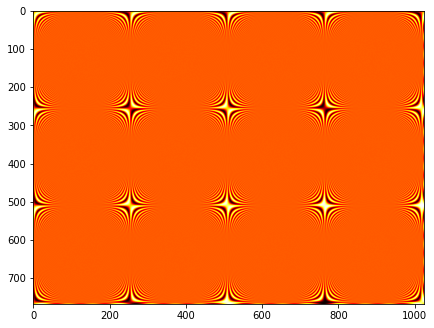

In [237]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
fig = plt.figure(1, figsize=(7, 6))
plt.imshow(data, cmap=cm.hot, interpolation="bicubic")
plt.show()

# Saving and loading
NumPy makes it easy to save and load `ndarray`s in binary or text format.

## Binary `.npy` format
Let's create a random array and save it.

In [238]:
a = np.random.rand(2,3)
a

array([[0.41379802, 0.25308477, 0.85467885],
       [0.05990099, 0.95793699, 0.77438039]])

In [239]:
np.save("my_array", a)

Done! Since the file name contains no file extension was provided, NumPy automatically added `.npy`. Let's take a peek at the file content:

In [240]:
with open("my_array.npy", "rb") as f:
    content = f.read()

content

b"\x93NUMPY\x01\x00v\x00{'descr': '<f8', 'fortran_order': False, 'shape': (2, 3), }                                                          \nz\x97\xb2\xaf\xaa{\xda?x\xf7\x86v\x8a2\xd0?j\xfc\xdcs\x87Y\xeb?\xd0\xe6\xbc\xb2W\xab\xae?\xe8~oxk\xa7\xee?\x9e\xff\x81d\xb9\xc7\xe8?"

To load this file into a NumPy array, simply call `load`:

In [241]:
a_loaded = np.load("my_array.npy")
a_loaded

array([[0.41379802, 0.25308477, 0.85467885],
       [0.05990099, 0.95793699, 0.77438039]])

## Text format
Let's try saving the array in text format:

In [242]:
np.savetxt("my_array.csv", a)

Now let's look at the file content:

In [243]:
with open("my_array.csv", "rt") as f:
    print(f.read())

4.137980190083606624e-01 2.530847699634857229e-01 8.546788466409342977e-01
5.990099007472127202e-02 9.579369880920838298e-01 7.743803942721461109e-01



This is a CSV file with tabs as delimiters. You can set a different delimiter:

In [244]:
np.savetxt("my_array.csv", a, delimiter=",")

To load this file, just use `loadtxt`:

In [245]:
a_loaded = np.loadtxt("my_array.csv", delimiter=",")
a_loaded

array([[0.41379802, 0.25308477, 0.85467885],
       [0.05990099, 0.95793699, 0.77438039]])

## Zipped `.npz` format
It is also possible to save multiple arrays in one zipped file:

In [246]:
b = np.arange(24, dtype=np.uint8).reshape(2, 3, 4)
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]], dtype=uint8)

In [247]:
np.savez("my_arrays", my_a=a, my_b=b)

Again, let's take a peek at the file content. Note that the `.npz` file extension was automatically added.

In [248]:
with open("my_arrays.npz", "rb") as f:
    content = f.read()

repr(content)[:180] + "[...]"

'b"PK\\x03\\x04\\x14\\x00\\x00\\x00\\x00\\x00\\x00\\x00!\\x00\\xfcP\\x87\\xf7\\xb0\\x00\\x00\\x00\\xb0\\x00\\x00\\x00\\x08\\x00\\x00\\x00my_a.npy\\x93NUMPY\\x01\\x00v\\x00{\'descr\': \'<f8\', \'fortran_order\': False,[...]'

You then load this file like so:

In [249]:
my_arrays = np.load("my_arrays.npz")
my_arrays

In [250]:
my_arrays.keys()

['my_a', 'my_b']

In [251]:
my_arrays["my_a"]

array([[0.41379802, 0.25308477, 0.85467885],
       [0.05990099, 0.95793699, 0.77438039]])

### Some Useful Resources

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

For some basic operations of Numpy package, you can download the [Cheat Sheet for NumPy Basics](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)

Large parts of this lab note originate from the following two resources:
[Quickstart tutorial](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)  and
[Python Numpy Tutorial](http://cs231n.github.io/python-numpy-tutorial/). Hereby, we acknowledge the contributors and developers for their efforts in providing these useful online resources.